In [49]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from timeit import default_timer as timer
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns


In [5]:

def bk(graph, P, R=set(), X=set()):
    bk.count += 1
    if not any((P, X)):
        yield R
    else:
        for node in P.copy():
            for r in bk(graph, P.intersection(graph.neighbors(node)),
                        R=R.union(set([node])), X=X.intersection(graph.neighbors(node))):
                yield r
            P.remove(node)
            X.add(node)


def bk_pivot(graph, P, R=set(), X=set()):
    bk_pivot.count += 1
    if not any((P, X)):
        yield R
    else:
        P_copy = P.copy()
        pivot = random.choice(list(P.union(X)))
        # pivot = int(str(random.sample(P_copy, 1)))
        for node in P_copy.difference((graph.neighbors(pivot))):
            for r in bk_pivot(graph, P.intersection(graph.neighbors(node)),
                              R=R.union(set([node])), X=X.intersection(graph.neighbors(node))):
                yield r
            P.remove(node)
            X.add(node)


def bk_order_pivot(graph, P, R=set(), X=set()):
    bk_order_pivot.count += 1
    if not any((P, X)):
        yield R
    else:
        P_copy = P.copy()
        pivot = random.choice(list(P.union(X)))
        # pivot = int(str(random.sample(P_copy, 1)))
        for node in P_copy.difference((graph.neighbors(pivot))):
            for r in bk_order_pivot(graph, P.intersection(graph.neighbors(node)),
                                    R=R.union(set([node])), X=X.intersection(graph.neighbors(node))):
                yield r
            P.remove(node)
            X.add(node)


def bk_order(graph, P, R=set(), X=set()):
    for node in P.copy():
        for r in bk_order_pivot(graph, P.intersection(graph.neighbors(node)),
                                R=R.union(set([node])), X=X.intersection(graph.neighbors(node))):
            yield r
        P.remove(node)
        X.add(node)

In [42]:
def run_test():
    results = pd.DataFrame()

    size_l = (10, 20, 30)
    type_l = ('Complete', 'Cycle','Path', 'Wheel')
    for type in type_l:
        for size in size_l:
            if type == 'Complete':
                graph = nx.complete_graph(size)
            elif type == 'Cycle':
                graph = nx.cycle_graph(size)
            elif type == 'Star':
                graph = nx.star_graph(size)
            elif type == 'Path':
                graph = nx.path_graph(size)
            else:
                graph = nx.wheel_graph(size)

            graph_o = graph
            graph = nx.complement(graph)

            bk_list = list()
            bk.count = 0
            start = timer()
            for clique in bk(graph, set(graph.nodes), set(), set()):
                bk_list.append(clique)
            end = timer()
            bk_time = end - start

            pivot_list = list()
            bk_pivot.count = 0
            start = timer()
            for clique in bk_pivot(graph, set(graph.nodes), set(), set()):
                pivot_list.append(clique)
            end = timer()
            pivot_time = end - start

            order_list = list()
            bk_order_pivot.count = 0
            start = timer()
            for clique in bk_order(graph, set(nx.algorithms.coloring.strategy_largest_first(graph, 1))):
                order_list.append(clique)
            end = timer()
            order_time = end - start
            to_add = pd.DataFrame({'Size': [size],
                                   'Type': [type],
                                   'Graph': [graph_o],
                                   'BK Calls': [bk.count],
                                   'BK Time': [bk_time],
                                   'BK MIS': [bk_list],
                                   'Pivot Calls': [bk_pivot.count],
                                   'Pivot Time': [pivot_time],
                                   'Pivot MIS': [pivot_list],
                                   'Order Calls': [bk_order_pivot.count],
                                   'Order Time': [order_time],
                                   'Order MIS': [order_list]})
            results = results.append(to_add)
    return results


In [43]:
results = run_test()

In [68]:
def analyze(results):
    #print(results.head)
    #scatter_matrix(results)
    
    #results.plot.scatter(x='BK Time',y='Size',color='Blue',label='Bron-Kerbosch')
    #plt.show()
    #results.plot.scatter(x='Pivot Time',y='Size',color='Green',label='BK with Pivot')
    #plt.show()
    #results.plot.scatter(x='Order Time',y='Size',color='Red',label='BK with Ordering')
    #plt.show()
    
    sns.pairplot(x_vars=["BK Time"], y_vars=["Size"], data=results, hue="Type", height=5, aspect=1.5)
    plt.show()
    sns.pairplot(x_vars=["Pivot Time"], y_vars=["Size"], data=results, hue="Type", height=5, aspect=1.5)
    plt.show()
    sns.pairplot(x_vars=["Order Time"], y_vars=["Size"], data=results, hue="Type", height=5, aspect=1.5)
    plt.show()
    
    

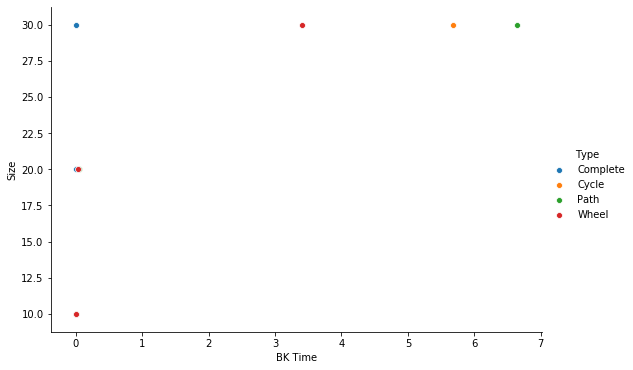

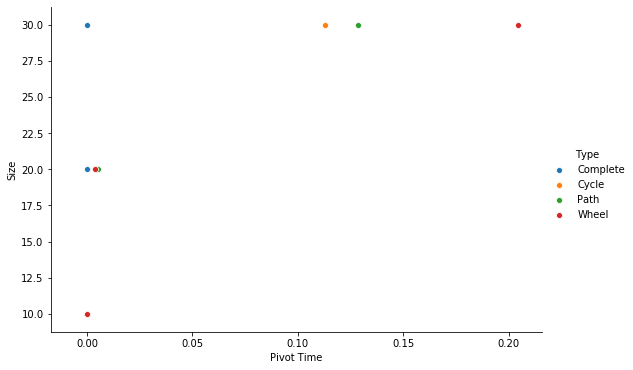

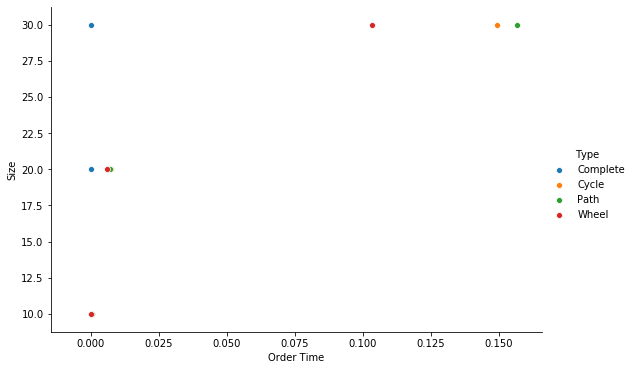

In [69]:
analyze(results)